In [66]:
import practicalSPARQL
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
root_q = 'queries'
root_d = 'results'

# read login data
login = pd.read_json('config_sparql.json')
ENDPOINT = login['endpoint'][0]
USERNAME = login['username'][0]
PASSWORD = login['password'][0]

# create sparql object
sparql = practicalSPARQL.practicalWrapper(ENDPOINT)
sparql.setCredentials(USERNAME, PASSWORD)

print("--- Querying ENDPOINT: {} ---".format(ENDPOINT))

--- Querying ENDPOINT: http://devmeta.sphaera.mpiwg-berlin.mpg.de/sparql ---


In [68]:
q = practicalSPARQL.stringify_SPARQL('query_influenced_100_104.sparql')    # select data from the ttl file as a dataframe
df_influenced = sparql.select_as_dataframe(q) 

In [69]:
df_influenced

,influenced_part,influenced_part_label,custom_identifier,carried_out_by,influenced_part_authors,num_books
0,http://sphaera.mpiwg-berlin.mpg.de/id/part/5ff...,Treatise on Cosmography (Sphaera),688,http://sphaera.mpiwg-berlin.mpg.de/id/part/5ff...,"Finé, Oronce",5
1,http://sphaera.mpiwg-berlin.mpg.de/id/part/078...,Strigel's treatise on the Sphere,779,http://sphaera.mpiwg-berlin.mpg.de/id/part/078...,"Strigel, Victorinus",2
2,http://sphaera.mpiwg-berlin.mpg.de/id/part/a22...,Introduction to Astronomy by Nunes,777,http://sphaera.mpiwg-berlin.mpg.de/id/part/a22...,"Nunes, Pedro",1
3,http://sphaera.mpiwg-berlin.mpg.de/id/part/a22...,Introduction to Astronomy by Nunes,777,http://sphaera.mpiwg-berlin.mpg.de/id/part/a22...,"Nunes, Pedro",1
4,http://sphaera.mpiwg-berlin.mpg.de/id/part/ced...,Sphere by Maurolico,808,http://sphaera.mpiwg-berlin.mpg.de/id/part/ced...,"Maurolico, Francesco",2
5,http://sphaera.mpiwg-berlin.mpg.de/id/part/520...,Sphere by Valerius,812,http://sphaera.mpiwg-berlin.mpg.de/id/part/520...,"Valerius, Cornelius",8
6,http://sphaera.mpiwg-berlin.mpg.de/id/part/bfb...,La Sphere des deux mondes,919,http://sphaera.mpiwg-berlin.mpg.de/id/part/bfb...,"Boileau de Bouillon, Gilles",1
7,http://sphaera.mpiwg-berlin.mpg.de/id/part/1e2...,First part of the Sphere treatise of Thomas Hill,928,http://sphaera.mpiwg-berlin.mpg.de/id/part/1e2...,"Hill, Thomas",1
8,http://sphaera.mpiwg-berlin.mpg.de/id/part/acd...,Second part of the Sphere treatise of Thomas Hill,929,http://sphaera.mpiwg-berlin.mpg.de/id/part/acd...,"Hill, Thomas",1
9,http://sphaera.mpiwg-berlin.mpg.de/id/part/47c...,Compendium by P. Valeriano,251,http://sphaera.mpiwg-berlin.mpg.de/id/part/47c...,"Valeriano, Pierio",34


In [70]:
q = practicalSPARQL.stringify_SPARQL('query_part_adaptions_100_104.sparql')    # select data from the ttl file as a dataframe
df_adaptions = sparql.select_as_dataframe(q)

In [71]:
# all the ids of related parts/adaptions
related_parts = list(set(list(df_adaptions.custom_identifier) + list(df_influenced.custom_identifier)))

related_parts = [str(entry) for entry in related_parts]

related_parts.sort()

related_parts = related_parts + ['100', '104'] # add original parts

In [72]:
q = practicalSPARQL.stringify_SPARQL('all_elements_with_artefacts_marked.sparql')    # select data from the ttl file as a dataframe
elements_marked = sparql.select_as_dataframe(q) 
len(elements_marked)

21238

In [73]:
# sort out all images that belong to a page labeled as artefact, duplicate etc.


elements = elements_marked[elements_marked.flag != "true"]
print(len(elements))
elements = elements.drop(["flag"], axis=1)
print(len(elements))
elements = elements.drop_duplicates(ignore_index=True)

#elements.loc[elements.custom_identifier == '104']


20921
20921


In [74]:
# now filter elements by their part identifier

entries_to_delete = []

for idx, entry in elements.iterrows():
    if entry.custom_identifier in related_parts:
        continue
    else: entries_to_delete.append(idx)

len(entries_to_delete)


4618

In [75]:
elements = elements.drop(entries_to_delete)
len(elements)

16240

In [76]:
elements

,images,keywords,cluster_name,bid,book,part_or_adaption,part_or_adaption_label,custom_identifier,pagenum,bb,page_label
0,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,CK_Relations Between the Spheres of the Sun an...,SIL_03326,1594,http://sphaera.mpiwg-berlin.mpg.de/id/item/8f5...,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Tractatus de sphaera,291,27,"xywh=116,929,875,476",nan
1,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,CK_08 Spheres;CK_Terraqueous Globe;CK_Parallel...,SIL_02440,1597,http://sphaera.mpiwg-berlin.mpg.de/id/item/ba1...,http://sphaera.mpiwg-berlin.mpg.de/id/part/524...,Sphaera by P. Catena,311,5,"xywh=1944,1029,1376,1404",nan
2,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,CK_Sphericity of the Heavens;MVK_Pictorial_Dia...,SIL_03167,1597,http://sphaera.mpiwg-berlin.mpg.de/id/item/ba1...,http://sphaera.mpiwg-berlin.mpg.de/id/part/524...,Sphaera by P. Catena,311,7,"xywh=2028,1340,638,601",nan
3,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,CK_Sphericity of the Water Element;CK_Terraque...,SIL_03188,1597,http://sphaera.mpiwg-berlin.mpg.de/id/item/ba1...,http://sphaera.mpiwg-berlin.mpg.de/id/part/524...,Sphaera by P. Catena,311,9,"xywh=1950,1422,1104,1234",nan
4,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,CK_Sun in Sign;MVK_Pictorial_Diagrams,SIL_02684,1597,http://sphaera.mpiwg-berlin.mpg.de/id/item/ba1...,http://sphaera.mpiwg-berlin.mpg.de/id/part/524...,Sphaera by P. Catena,311,16,"xywh=591,1806,723,723",nan
...,...,...,...,...,...,...,...,...,...,...,...
20853,http://www.researchspace.org/ontology/ImageReg...,SK_3.10 Day and Night;CK_Movement of the Sun;M...,SIL_01897,2281,http://sphaera.mpiwg-berlin.mpg.de/id/item/af4...,http://sphaera.mpiwg-berlin.mpg.de/id/part/47c...,Compendium by P. Valeriano,251,333,"xywh=569,1056,617,597",nan
20854,http://www.researchspace.org/ontology/ImageReg...,SK_3.10 Day and Night;CK_Movement of the Sun;M...,SIL_01491,2281,http://sphaera.mpiwg-berlin.mpg.de/id/item/af4...,http://sphaera.mpiwg-berlin.mpg.de/id/part/47c...,Compendium by P. Valeriano,251,334,"xywh=439,1330,587,563",nan
20855,http://www.researchspace.org/ontology/ImageReg...,CK_Solar Eclipse;MVK_Pictorial_Diagrams;MTK_So...,SIL_03580,2281,http://sphaera.mpiwg-berlin.mpg.de/id/item/af4...,http://sphaera.mpiwg-berlin.mpg.de/id/part/47c...,Compendium by P. Valeriano,251,340,"xywh=460,276,1026,1504",nan
20856,http://www.researchspace.org/ontology/ImageReg...,CK_Lunar Eclipse;MVK_Pictorial_Diagrams;MTK_Lu...,SIL_03550,2281,http://sphaera.mpiwg-berlin.mpg.de/id/item/af4...,http://sphaera.mpiwg-berlin.mpg.de/id/part/47c...,Compendium by P. Valeriano,251,341,"xywh=130,590,1067,1575",nan


In [77]:
path_to_xlsx1 = 'G:\\My Drive\\DataFiles\\Full_Image_List_6.5.24\\all_elements.xlsx'

In [78]:
df1 = pd.read_excel(path_to_xlsx1)

In [79]:
# Function to extract the identifier from the URL
def extract_identifier(url):
    # Split the URL by '/' and return the last part
    return url.split('/')[-1]

# Create the identifier column in both dataframes
elements['identifier'] = elements['images'].apply(extract_identifier)
df1['identifier'] = df1['images'].apply(extract_identifier)

# Merge the dataframes on the identifier column
merged_df = pd.merge(elements, df1, on='identifier', how='inner')

# Drop the identifier column if not needed
merged_df.drop(columns=['identifier'], inplace=True)


In [80]:
merged_df

,images_x,keywords_x,cluster_name_x,bid_x,book_x,part_or_adaption_x,part_or_adaption_label_x,custom_identifier,pagenum_x,bb_x,...,publishers,printers,place,year,bid_y,book_y,part_or_adaption_y,part_or_adaption_label_y,pagenum_y,bb_y
0,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,CK_Relations Between the Spheres of the Sun an...,SIL_03326,1594,http://sphaera.mpiwg-berlin.mpg.de/id/item/8f5...,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Tractatus de sphaera,291,27,"xywh=116,929,875,476",...,Company Heirs of Peter I. Seitz,Company Heirs of Peter I. Seitz,Wittenberg,1550,1594,http://sphaera.mpiwg-berlin.mpg.de/id/item/8f5...,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Tractatus de sphaera,27,"xywh=116,929,875,476"
1,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,CK_08 Spheres;CK_Terraqueous Globe;CK_Parallel...,SIL_02440,1597,http://sphaera.mpiwg-berlin.mpg.de/id/item/ba1...,http://sphaera.mpiwg-berlin.mpg.de/id/part/524...,Sphaera by P. Catena,311,5,"xywh=1944,1029,1376,1404",...,"Percacino, Grazioso","Percacino, Grazioso",Padua,1561,1597,http://sphaera.mpiwg-berlin.mpg.de/id/item/ba1...,http://sphaera.mpiwg-berlin.mpg.de/id/part/524...,Sphaera by P. Catena,5,"xywh=1944,1029,1376,1404"
2,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,CK_Sphericity of the Heavens;MVK_Pictorial_Dia...,SIL_03167,1597,http://sphaera.mpiwg-berlin.mpg.de/id/item/ba1...,http://sphaera.mpiwg-berlin.mpg.de/id/part/524...,Sphaera by P. Catena,311,7,"xywh=2028,1340,638,601",...,"Percacino, Grazioso","Percacino, Grazioso",Padua,1561,1597,http://sphaera.mpiwg-berlin.mpg.de/id/item/ba1...,http://sphaera.mpiwg-berlin.mpg.de/id/part/524...,Sphaera by P. Catena,7,"xywh=2028,1340,638,601"
3,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,CK_Sphericity of the Water Element;CK_Terraque...,SIL_03188,1597,http://sphaera.mpiwg-berlin.mpg.de/id/item/ba1...,http://sphaera.mpiwg-berlin.mpg.de/id/part/524...,Sphaera by P. Catena,311,9,"xywh=1950,1422,1104,1234",...,"Percacino, Grazioso","Percacino, Grazioso",Padua,1561,1597,http://sphaera.mpiwg-berlin.mpg.de/id/item/ba1...,http://sphaera.mpiwg-berlin.mpg.de/id/part/524...,Sphaera by P. Catena,9,"xywh=1950,1422,1104,1234"
4,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,CK_Sun in Sign;MVK_Pictorial_Diagrams,SIL_02684,1597,http://sphaera.mpiwg-berlin.mpg.de/id/item/ba1...,http://sphaera.mpiwg-berlin.mpg.de/id/part/524...,Sphaera by P. Catena,311,16,"xywh=591,1806,723,723",...,"Percacino, Grazioso","Percacino, Grazioso",Padua,1561,1597,http://sphaera.mpiwg-berlin.mpg.de/id/item/ba1...,http://sphaera.mpiwg-berlin.mpg.de/id/part/524...,Sphaera by P. Catena,16,"xywh=591,1806,723,723"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16815,http://www.researchspace.org/ontology/ImageReg...,SK_3.10 Day and Night;CK_Movement of the Sun;M...,SIL_01897,2281,http://sphaera.mpiwg-berlin.mpg.de/id/item/af4...,http://sphaera.mpiwg-berlin.mpg.de/id/part/47c...,Compendium by P. Valeriano,251,333,"xywh=569,1056,617,597",...,"Bellère, Jean","Bellère, Jean",Antwerp,1582,2281,http://sphaera.mpiwg-berlin.mpg.de/id/item/af4...,http://sphaera.mpiwg-berlin.mpg.de/id/part/47c...,Compendium by P. Valeriano,333,"xywh=569,1056,617,597"
16816,http://www.researchspace.org/ontology/ImageReg...,SK_3.10 Day and Night;CK_Movement of the Sun;M...,SIL_01491,2281,http://sphaera.mpiwg-berlin.mpg.de/id/item/af4...,http://sphaera.mpiwg-berlin.mpg.de/id/part/47c...,Compendium by P. Valeriano,251,334,"xywh=439,1330,587,563",...,"Bellère, Jean","Bellère, Jean",Antwerp,1582,2281,http://sphaera.mpiwg-berlin.mpg.de/id/item/af4...,http://sphaera.mpiwg-berlin.mpg.de/id/part/47c...,Compendium by P. Valeriano,334,"xywh=439,1330,587,563"
16817,http://www.researchspace.org/ontology/ImageReg...,CK_Solar Eclipse;MVK_Pictorial_Diagrams;MTK_So...,SIL_03580,2281,http://sphaera.mpiwg-berlin.mpg.de/id/item/af4...,http://sphaera.mpiwg-berlin.mpg.de/id/part/47c...,Compendium by P. Valeriano,251,340,"xywh=460,276,1026,15

In [83]:
# Function to categorize custom_identifier into part_type
def categorize_part_type(custom_identifier):
    if custom_identifier == '100':
        return 'Tractatus_original'
    elif custom_identifier == '104':
        return 'Theorica_Nova_original'
    elif custom_identifier in df_influenced['custom_identifier'].values:
        return 'Influenced'
    elif custom_identifier in df_adaptions['custom_identifier'].values:
        return 'Adaptions'
    else:
        return 'Other'  # or handle differently if needed

# Apply the function to create part_type column
merged_df['part_type'] = merged_df['custom_identifier'].apply(categorize_part_type)

In [84]:
merged_df

,images_x,keywords_x,cluster_name_x,bid_x,book_x,part_or_adaption_x,part_or_adaption_label_x,custom_identifier,pagenum_x,bb_x,...,printers,place,year,bid_y,book_y,part_or_adaption_y,part_or_adaption_label_y,pagenum_y,bb_y,part_type
0,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,CK_Relations Between the Spheres of the Sun an...,SIL_03326,1594,http://sphaera.mpiwg-berlin.mpg.de/id/item/8f5...,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Tractatus de sphaera,291,27,"xywh=116,929,875,476",...,Company Heirs of Peter I. Seitz,Wittenberg,1550,1594,http://sphaera.mpiwg-berlin.mpg.de/id/item/8f5...,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Tractatus de sphaera,27,"xywh=116,929,875,476",Adaptions
1,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,CK_08 Spheres;CK_Terraqueous Globe;CK_Parallel...,SIL_02440,1597,http://sphaera.mpiwg-berlin.mpg.de/id/item/ba1...,http://sphaera.mpiwg-berlin.mpg.de/id/part/524...,Sphaera by P. Catena,311,5,"xywh=1944,1029,1376,1404",...,"Percacino, Grazioso",Padua,1561,1597,http://sphaera.mpiwg-berlin.mpg.de/id/item/ba1...,http://sphaera.mpiwg-berlin.mpg.de/id/part/524...,Sphaera by P. Catena,5,"xywh=1944,1029,1376,1404",Influenced
2,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,CK_Sphericity of the Heavens;MVK_Pictorial_Dia...,SIL_03167,1597,http://sphaera.mpiwg-berlin.mpg.de/id/item/ba1...,http://sphaera.mpiwg-berlin.mpg.de/id/part/524...,Sphaera by P. Catena,311,7,"xywh=2028,1340,638,601",...,"Percacino, Grazioso",Padua,1561,1597,http://sphaera.mpiwg-berlin.mpg.de/id/item/ba1...,http://sphaera.mpiwg-berlin.mpg.de/id/part/524...,Sphaera by P. Catena,7,"xywh=2028,1340,638,601",Influenced
3,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,CK_Sphericity of the Water Element;CK_Terraque...,SIL_03188,1597,http://sphaera.mpiwg-berlin.mpg.de/id/item/ba1...,http://sphaera.mpiwg-berlin.mpg.de/id/part/524...,Sphaera by P. Catena,311,9,"xywh=1950,1422,1104,1234",...,"Percacino, Grazioso",Padua,1561,1597,http://sphaera.mpiwg-berlin.mpg.de/id/item/ba1...,http://sphaera.mpiwg-berlin.mpg.de/id/part/524...,Sphaera by P. Catena,9,"xywh=1950,1422,1104,1234",Influenced
4,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,CK_Sun in Sign;MVK_Pictorial_Diagrams,SIL_02684,1597,http://sphaera.mpiwg-berlin.mpg.de/id/item/ba1...,http://sphaera.mpiwg-berlin.mpg.de/id/part/524...,Sphaera by P. Catena,311,16,"xywh=591,1806,723,723",...,"Percacino, Grazioso",Padua,1561,1597,http://sphaera.mpiwg-berlin.mpg.de/id/item/ba1...,http://sphaera.mpiwg-berlin.mpg.de/id/part/524...,Sphaera by P. Catena,16,"xywh=591,1806,723,723",Influenced
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16815,http://www.researchspace.org/ontology/ImageReg...,SK_3.10 Day and Night;CK_Movement of the Sun;M...,SIL_01897,2281,http://sphaera.mpiwg-berlin.mpg.de/id/item/af4...,http://sphaera.mpiwg-berlin.mpg.de/id/part/47c...,Compendium by P. Valeriano,251,333,"xywh=569,1056,617,597",...,"Bellère, Jean",Antwerp,1582,2281,http://sphaera.mpiwg-berlin.mpg.de/id/item/af4...,http://sphaera.mpiwg-berlin.mpg.de/id/part/47c...,Compendium by P. Valeriano,333,"xywh=569,1056,617,597",Influenced
16816,http://www.researchspace.org/ontology/ImageReg...,SK_3.10 Day and Night;CK_Movement of the Sun;M...,SIL_01491,2281,http://sphaera.mpiwg-berlin.mpg.de/id/item/af4...,http://sphaera.mpiwg-berlin.mpg.de/id/part/47c...,Compendium by P. Valeriano,251,334,"xywh=439,1330,587,563",...,"Bellère, Jean",Antwerp,1582,2281,http://sphaera.mpiwg-berlin.mpg.de/id/item/af4...,http://sphaera.mpiwg-berlin.mpg.de/id/part/47c...,Compendium by P. Valeriano,334,"xywh=439,1330,587,563",Influenced
16817,http://www.researchspace.org/ontology/ImageReg...,CK_Solar Eclipse;MVK_Pictorial_Diagrams;MTK_So...,SIL_03580,2281,http://sphaera.mpiwg-berlin.mpg.de/id/item/af4...,http://sphaera.mpiwg-berlin.mpg.de/id/part/47c...,Compendium by P. Valeriano,251,340,"xywh=460,276,1026,1504",...,"Bellère, Jean",Antwerp,1582,2281,http://sphaera.mpiwg-berlin.mpg.de/

C:\Users\nogas\AppData\Local\Temp\ipykernel_2816\887280797.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = merged_df.groupby(['part_type', 'year_interval']).size().reset_index(name='count')


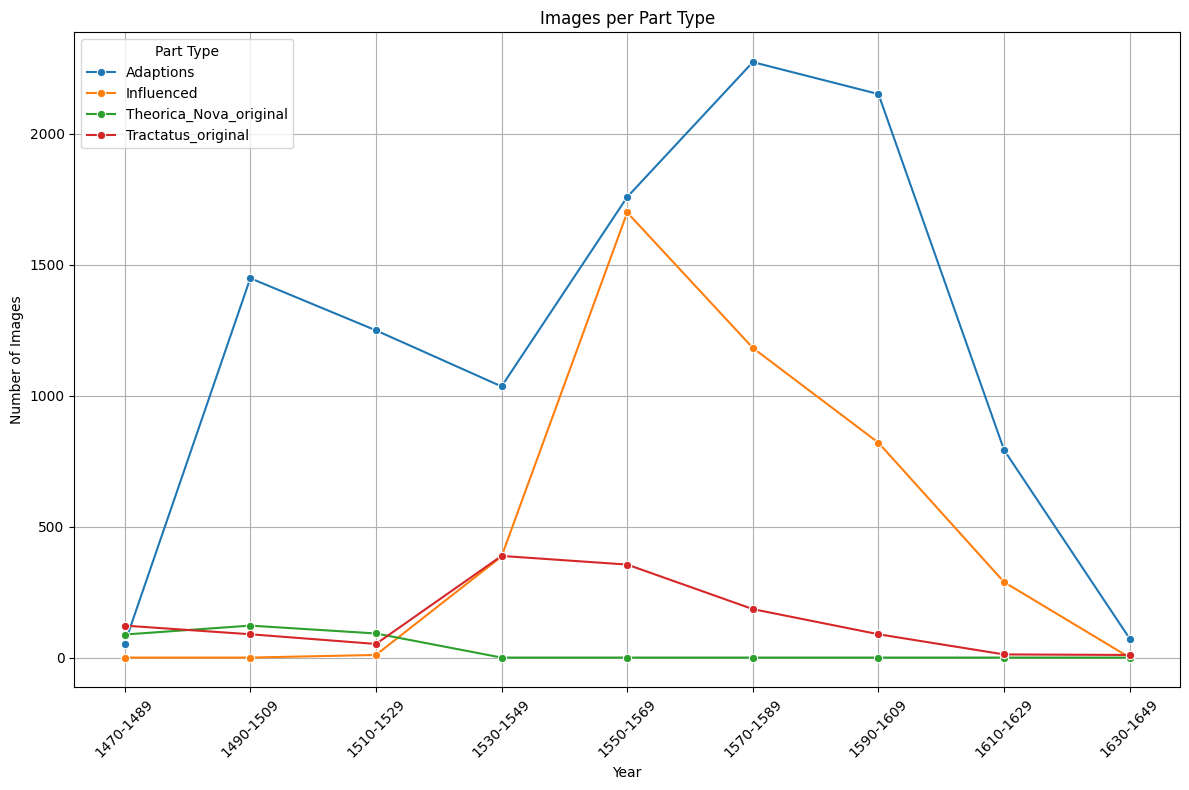

In [99]:
# Create bins for 20-year intervals from 1470 to 1650
bins = range(1470, 1660, 20)
labels = [f'{start}-{start+19}' for start in bins[:-1]]

# Assign each row to a 20-year interval
merged_df['year_interval'] = pd.cut(merged_df['year'], bins=bins, labels=labels, right=False)

# Count images per part_type and year_interval
counts = merged_df.groupby(['part_type', 'year_interval']).size().reset_index(name='count')

# Plotting
plt.figure(figsize=(12, 8))
sns.lineplot(x='year_interval', y='count', hue='part_type', data=counts, marker='o')
plt.title('Images per Part Type')
plt.xlabel('Year')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(title='Part Type', loc='upper left')
plt.show()